In [16]:
# load packages necessary
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
# load data
df = pd.read_csv('/Users/itsalthomas/Desktop/healthcare_breaches.csv')
df

,Rank,Year,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach
0,1,2024,"Change Healthcare, Inc.",MN,Business Associate,"190,000,000",Hacking/IT Incident
1,2,2015,Anthem Inc.,IN,Health Plan,"78,800,000",Hacking/IT Incident
2,3,2023,"Welltok, Inc.",CO,Business Associate,"14,782,887",Hacking/IT Incident
3,4,2024,"Kaiser Foundation Health Plan, Inc.",CA,Health Plan,"13,400,000",Unauthorized Access/Disclosure
4,5,2019,"Optum360, LLC",MN,Business Associate,"11,500,000",Hacking/IT Incident
...,...,...,...,...,...,...,...
74,75,2011,GRM Information Management Services,NJ,Business Associate,"1,700,000",Theft
75,76,2022,Baptist Medical Center,TX,Healthcare Provider,"1,608,549",Hacking/IT Incident
76,77,2019,Inmediata Health Group,PR,Healthcare Clearing House,"1,565,338",Unauthorized Access/Disclosure
77,78,2021,Eskenazi Health,IN,Healthcare Provider,"1,515,918",Hacking/IT Incident


In [18]:
# EDA

df.isnull().sum()

# ensure proper data types
df.dtypes

# clean Individuals Affected
# remove commas and convert to integer
df['Individuals Affected'] = df['Individuals Affected'].astype(str).str.replace(',', '').astype(int)

# new datatypes
df.dtypes


Rank                       int64
Year                       int64
Name of Covered Entity    object
State                     object
Covered Entity Type       object
Individuals Affected       int64
Type of Breach            object
dtype: object

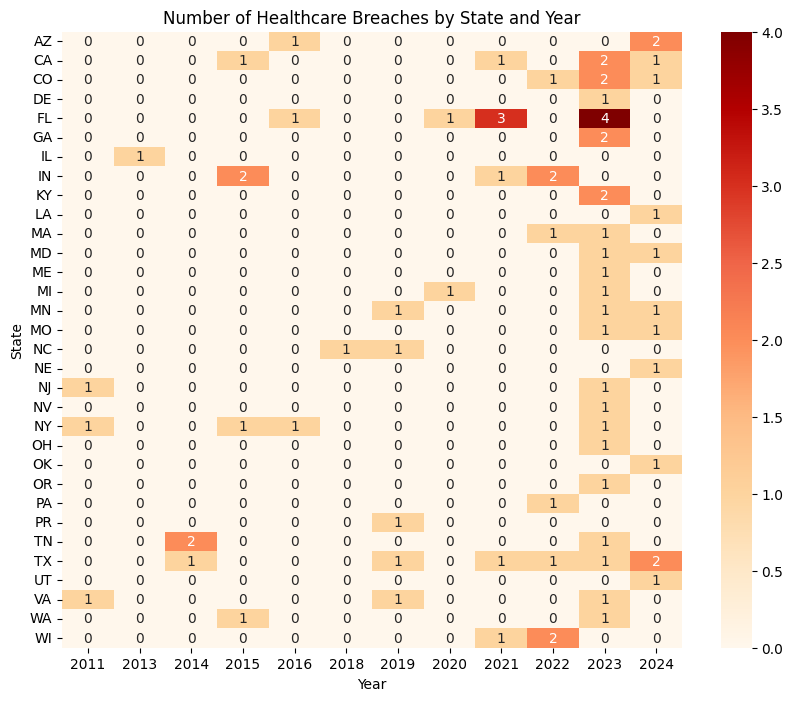

In [26]:
## visualize some insights##
# heatmap of breaches by State and Year

# create pivot table
heatmap_data = df.pivot_table(
    index='State',
    columns='Year',
    values='Name of Covered Entity',  
    aggfunc='count',  # counting number of breaches
    fill_value=0      
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='OrRd')
plt.title('Number of Healthcare Breaches by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()


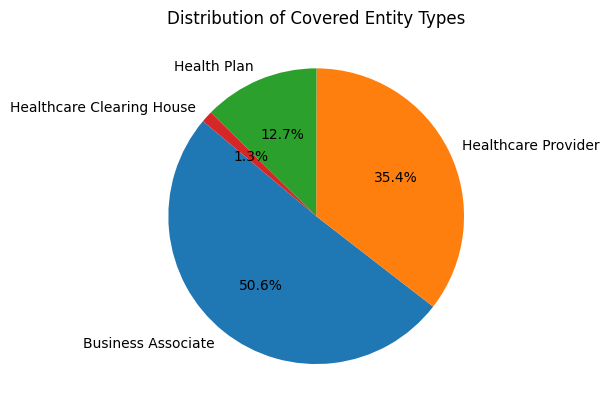

In [28]:
# pie chat 
df['Covered Entity Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Covered Entity Types')
plt.ylabel('')
plt.show()


In [36]:
## predict # of Individuals Affected - regression ##
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# encode categorical features
X = pd.get_dummies(df[['State', 'Covered Entity Type', 'Type of Breach', 'Year']], drop_first=True)

# log-transform target - prevent skew since data is small
y = np.log1p(df['Individuals Affected'])

# train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80/20% split 
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# view metrics
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 2.24
RMSE: 1.50
MAE: 0.93
R2 Score: -0.87


In [35]:
from sklearn.linear_model import LinearRegression
baseline = LinearRegression()
baseline.fit(X_train, y_train)
print(f'Baseline R2:', r2_score(y_test, baseline.predict(X_test)))


Baseline R2: -0.9219737790726013
